
In sound processing, the Mel-frequency cepstrum (MFC) is a representation of a sound\'s short-term power spectrum. It is derived through a linear cosine transform of the log power spectrum, calculated on a nonlinear Mel scale of frequency. Mel-frequency cepstral coefficients (MFCCs) are the individual coefficients constituting the MFC representation.

MFCC is a feature extraction technique widely used in speech and audio processing. MFCCs are used to represent the spectral characteristics of sound in a way that is well-suited for various machine learning tasks, such as speech recognition and music analysis. Below figure shows the step-by-step process of extracting MFCC features.

<img src="https://www.mdpi.com/electronics/electronics-08-00924/article_deploy/html/images/electronics-08-00924-g001.png"
style="width:5.85278in;height:2.34861in" />

> **Your task is to predict the Genus of frogs given a set of MFCC
> features**. The dataset for this problem is "Q1Data.csv". The dataset
> contains 21 MFCC features and its corresponding Family, Genus and
> Species in the Frog Family.

In [1]:
# !pip install gdown --upgrade
!gdown 1aIBc6HuNurXsfj4Hzw85iUfsUtvt5y5J

Downloading...
From: https://drive.google.com/uc?id=1aIBc6HuNurXsfj4Hzw85iUfsUtvt5y5J
To: /content/Q1Data.csv
100% 2.17M/2.17M [00:00<00:00, 144MB/s]


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn import tree
from sklearn import neighbors
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# other imports if necessary

Q1Data = pd.read_csv('/content/Q1Data.csv')
Q1Data = Q1Data.rename(columns={
    'MFCCs_ 1' : 'MFCCs_1',
    'MFCCs_ 2' : 'MFCCs_2',
    'MFCCs_ 3' : 'MFCCs_3',
    'MFCCs_ 4' : 'MFCCs_4',
    'MFCCs_ 5' : 'MFCCs_5',
    'MFCCs_ 6' : 'MFCCs_6',
    'MFCCs_ 7' : 'MFCCs_7',
    'MFCCs_ 8' : 'MFCCs_8',
})

print(Q1Data.isnull().sum())
print(Q1Data['Genus'].value_counts())
print(Q1Data.describe())
print(Q1Data.info())
Q1Data.head()

MFCCs_1     0
MFCCs_2     0
MFCCs_3     0
MFCCs_4     0
MFCCs_5     0
MFCCs_6     0
MFCCs_7     0
MFCCs_8     0
MFCCs_9     0
MFCCs_10    0
MFCCs_11    0
MFCCs_12    0
MFCCs_13    0
MFCCs_14    0
MFCCs_15    0
MFCCs_16    0
MFCCs_17    0
MFCCs_18    0
MFCCs_19    0
MFCCs_20    0
MFCCs_21    0
Family      0
Genus       0
Species     0
dtype: int64
Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64
           MFCCs_1      MFCCs_2      MFCCs_3      MFCCs_4      MFCCs_5  \
count  7195.000000  7195.000000  7195.000000  7195.000000  7195.000000   
mean      0.323584     0.311224     0.445997     0.127046     0.097939   
std       0.218653     0.263527     0.160328     0.162722     0.120412   
min      -0.673025    -0.436028    -0.472676    -0.636012    -0.410417   
25%       0.165945     0.138445     0.336737     0.051717     0.012581   
50%  

,MFCCs_1,MFCCs_2,MFCCs_3,MFCCs_4,MFCCs_5,MFCCs_6,MFCCs_7,MFCCs_8,MFCCs_9,MFCCs_10,...,MFCCs_15,MFCCs_16,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,Family,Genus,Species
0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,0.188654,...,-0.024017,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre
1,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,0.270958,...,0.012022,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre
2,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,0.266064,...,0.083536,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre
3,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,0.267279,...,-0.050224,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre
4,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,0.332695,...,0.062837,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre


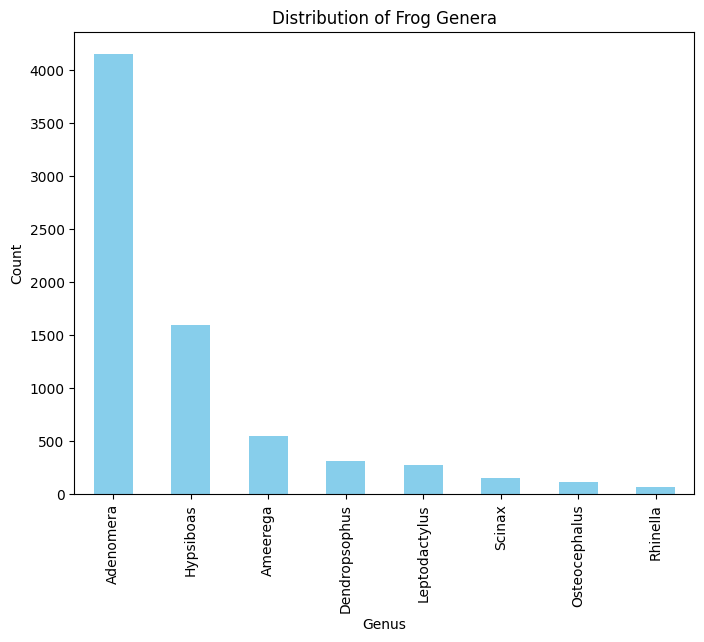

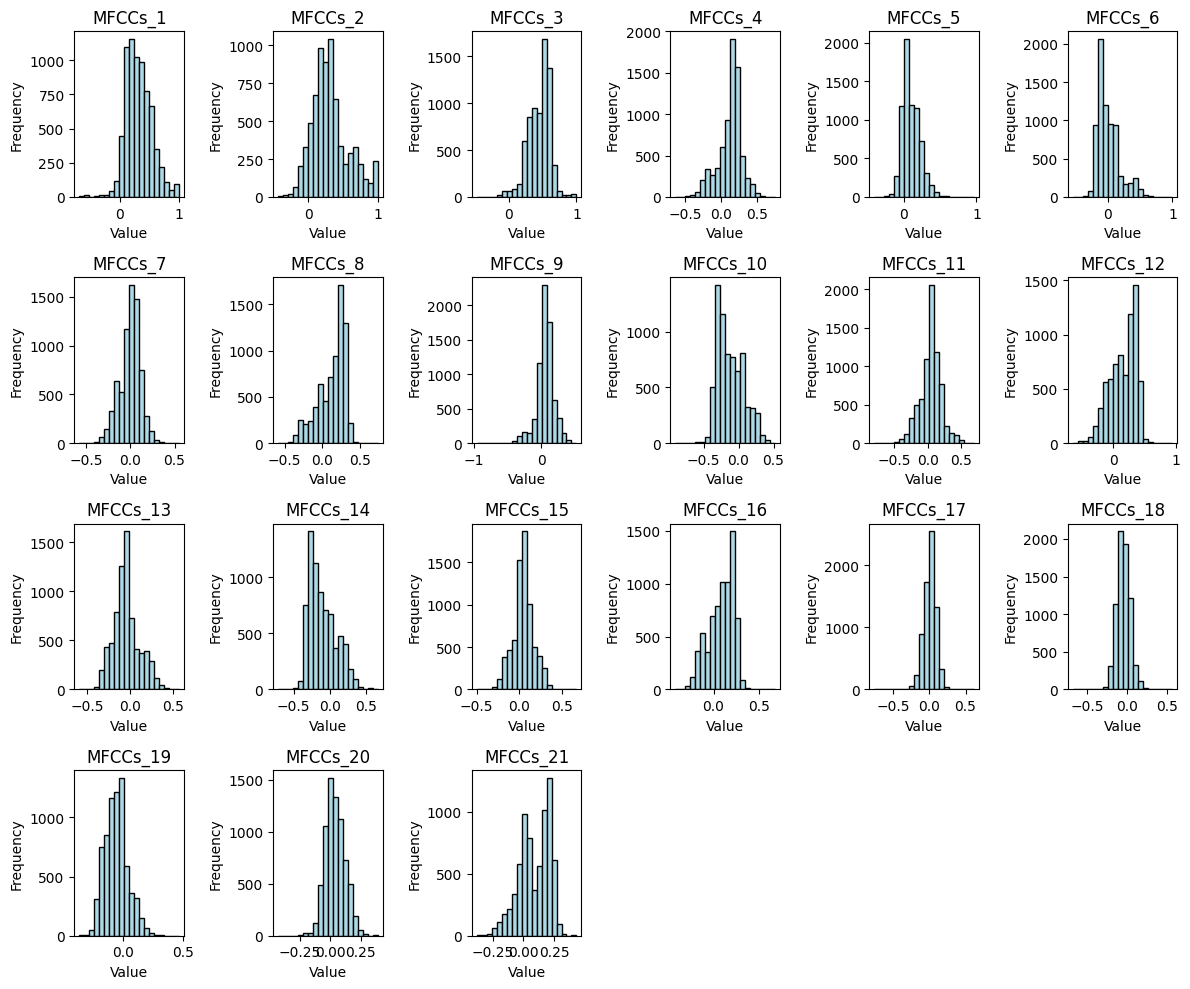

In [3]:
# Data Visualization - Bar plot for 'Genus' distribution
plt.figure(figsize=(8, 6))
Q1Data['Genus'].value_counts().plot(kind='bar', color='skyblue')
plt.title('Distribution of Frog Genera')
plt.xlabel('Genus')
plt.ylabel('Count')
plt.show()
print()
# Feature Exploration - Visualize distribution of individual MFCC features
plt.figure(figsize=(12, 10))
for i in range(1, 22):
    plt.subplot(4, 6, i)
    plt.hist(Q1Data[f'MFCCs_{i}'], bins=20, color='lightblue', edgecolor='black')
    plt.title(f'MFCCs_{i}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

def standardization(X):
    mean_values = X.mean(axis=0)
    std_dev_values = X.std(axis=0)
    standardized_X = (X - mean_values) / std_dev_values
    return standardized_X.values

> Part 1 : Decision Trees
>
> a\. Write a code **from scratch** to train a Decision
> Tree Classifier to predict the Genus using the **first 6 features
> (MFCC_1 ,...., MFCC_6)** of the given dataset by splitting the dataset
> into train and test in the ratio of **20:80**.
>
> b\. Plot the test accuracy by pruning the tree to a **depth ranging
> from 1,2,.....15.**
>
> c\. What are your observations from the graph plotted above?

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


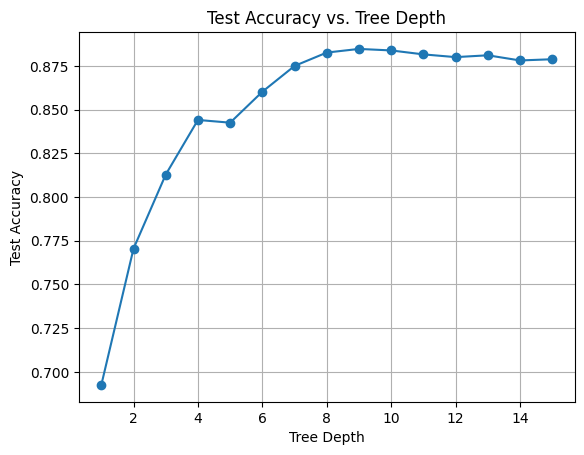

In [4]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
data = Q1Data[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'Genus']]

# Split into features (X) and target variable (y)
X = data.iloc[:, :6]
y = data["Genus"]


# Initialize the encoder
# encoder =
# Fit the encoder and transform 'y' to numerical categories
y = LabelEncoder().fit_transform(y)

# def standardization(X):
#     mean_values = X.mean(axis=0)
#     std_dev_values = X.std(axis=0)
#     standardized_X = (X - mean_values) / std_dev_values
#     return standardized_X.values

# Step 2: Feature scaling
X_scaled = standardization(X)

# Step 3: Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# Decision Tree Classifier Code
class Node:
    def __init__(self, predicted_class):
        self.predicted_class = predicted_class
        self.feature_index = 0
        self.threshold = 0
        self.left = None
        self.right = None

class Decision_Tree_Classifier:
    def __init__(self, max_depth=None):
        self.max_depth = max_depth

    def fit(self, X, y):
        self.n_classes_ = len(set(y))
        self.n_features_ = X.shape[1]
        self.tree_ = self._grow_tree(X, y)

    def predict(self, X):
        return [self._predict(inputs) for inputs in X]

    def _best_split(self, X, y):
        m = y.size
        if m <= 1:
            return None, None
        num_parent = [np.sum(y == c) for c in range(self.n_classes_)]
        best_gini = 1.0 - sum((n / m) ** 2 for n in num_parent)
        best_idx, best_thr = None, None
        for idx in range(self.n_features_):
            thresholds, classes = zip(*sorted(zip(X[:, idx], y)))
            num_left = [0] * self.n_classes_
            num_right = num_parent.copy()
            for i in range(1, m):
                c = classes[i - 1]
                num_left[c] += 1
                num_right[c] -= 1
                gini_left = 1.0 - sum(
                    (num_left[x] / i) ** 2 for x in range(self.n_classes_)
                )
                gini_right = 1.0 - sum(
                    (num_right[x] / (m - i)) ** 2 for x in range(self.n_classes_)
                )
                gini = (i * gini_left + (m - i) * gini_right) / m
                if thresholds[i] == thresholds[i - 1]:
                    continue
                if gini < best_gini:
                    best_gini = gini
                    best_idx = idx
                    best_thr = (thresholds[i] + thresholds[i - 1]) / 2
        return best_idx, best_thr

    def _grow_tree(self, X, y, depth=0):
        num_samples_per_class = [np.sum(y == i) for i in range(self.n_classes_)]
        predicted_class = np.argmax(num_samples_per_class)
        node = Node(predicted_class=predicted_class)
        if depth < self.max_depth:
            idx, thr = self._best_split(X, y)
            if idx is not None:
                indices_left = X[:, idx] < thr
                X_left, y_left = X[indices_left], y[indices_left]
                X_right, y_right = X[~indices_left], y[~indices_left]
                node.feature_index = idx
                node.threshold = thr
                node.left = self._grow_tree(X_left, y_left, depth + 1)
                node.right = self._grow_tree(X_right, y_right, depth + 1)
        return node

    def _predict(self, inputs):
        node = self.tree_
        while node.left:
            if inputs[node.feature_index] < node.threshold:
                node = node.left
            else:
                node = node.right
        return node.predicted_class

# Part 1a: Train Decision Tree Classifier from scratch
max_depths = list(range(1, 16))
dt_test_accuracies = []
for max_depth in max_depths:
    print(max_depth)
    dt_classifier = Decision_Tree_Classifier(max_depth=max_depth)
    dt_classifier.fit(X_train, y_train)
    y_pred = dt_classifier.predict(X_test)
    accuracy = np.sum(y_pred == y_test) / len(y_test)
    dt_test_accuracies.append(accuracy)

# Part 1b: Plot the test accuracy by pruning the tree
plt.plot(max_depths, dt_test_accuracies, marker='o')
plt.title('Test Accuracy vs. Tree Depth')
plt.xlabel('Tree Depth')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


In [5]:
# @title Default title text
# # @title Part 1


# # Define the Decision Tree Node class
# class Node:
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
#         self.feature_index = feature_index  # Index of the feature to split on
#         self.threshold = threshold  # Threshold value for the split
#         self.left = left  # Left subtree
#         self.right = right  # Right subtree
#         self.value = value  # Class label for leaf nodes

# # Decision Tree Classifier
# class DecisionTreeClassifier:
#     def __init__(self, max_depth=None):
#         self.max_depth = max_depth  # Maximum depth of the tree
#         self.tree = None  # Root of the decision tree

#     def fit(self, X, y):
#         self.tree = self._fit(X, y, depth=0)

#     def _fit(self, X, y, depth):
#         num_samples, num_features = X.shape
#         unique_classes, counts = np.unique(y, return_counts=True)
#         most_common_class = unique_classes[np.argmax(counts)]

#         # Stop conditions
#         if depth == self.max_depth or len(np.unique(y)) == 1:
#             return Node(value=most_common_class)

#         # Find the best split
#         best_gini = float('inf')
#         best_feature_index = None
#         best_threshold = None

#         for feature_index in range(num_features):
#             thresholds = np.unique(X[:, feature_index])
#             for threshold in thresholds:
#                 left_mask = X[:, feature_index] <= threshold
#                 right_mask = ~left_mask
#                 len_y_l = len(y[left_mask])
#                 len_y_r = len(y[right_mask])
#                 classes_l, counts_l = np.unique(y[left_mask], return_counts=True)
#                 classes_r, counts_r = np.unique(y[right_mask], return_counts=True)
#                 # gini = (self._gini_impurity(y[left_mask]) * len_y_l + self._gini_impurity(y[right_mask]) * len_y_r) / num_samples
#                 gini = ((1 - np.sum((counts_l / len_y_l) ** 2)) * len_y_l + (1 - np.sum((counts_r / len_y_r) ** 2)) * len_y_r) / num_samples

#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature_index = feature_index
#                     best_threshold = threshold

#         if best_gini == float('inf'):
#             return Node(value=most_common_class)

#         # Recursive split
#         left_mask = X[:, best_feature_index] <= best_threshold
#         right_mask = ~left_mask
#         left_subtree = self._fit(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self._fit(X[right_mask], y[right_mask], depth + 1)

#         return Node(feature_index=best_feature_index, threshold=best_threshold, left=left_subtree, right=right_subtree)

#     # def _gini_impurity(self, y):
#     #     classes, counts = np.unique(y, return_counts=True)
#     #     # probabilities = counts / len(y)
#     #     # gini = 1 - np.sum(probabilities ** 2)
#     #     # return gini
#     #     return (1 - np.sum((counts / len(y)) ** 2))

#     def predict(self, X):
#         return np.array([self._predict(x, self.tree) for x in X])

#     def _predict(self, x, node):
#         if node.value is not None:
#             return node.value
#         if x[node.feature_index] <= node.threshold:
#             return self._predict(x, node.left)
#         else:
#             return self._predict(x, node.right)

# # Load the dataset
# data = Q1Data[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'Genus']]

# # # Split into features (X) and target variable (y)
# X = data.iloc[:, :6]
# y = data["Genus"]


# # def standardization(X):
# #     mean_values = X.mean(axis=0)
# #     std_dev_values = X.std(axis=0)
# #     standardized_X = (X - mean_values) / std_dev_values
# #     return standardized_X.values


# # # Step 2: Feature scaling
# X = data.iloc[:, :6]
# X_scaled = standardization(X)
# # y_encoded = [{label: idx for idx, label in enumerate(set(y))}[label] for label in y]
# # print(X, '\n')
# # X_scaled1 = StandardScaler().fit_transform(X)
# # print(X_scaled1)
# # print(StandardScaler, '\n')
# # X = data_encoded.iloc[:, :6]
# # X_scaled = min_max_scaling(X)
# # print(X_scaled)
# # print(min_max_scaling, '\n')
# # print(X_scaled2)
# # print(standardization, '\n')
# # X = data_encoded.iloc[:, :6]
# # X_scaled = robust_scaling(X)
# # print(X_scaled)
# # print(robust_scaling, '\n')
# # X = data_encoded.iloc[:, :6]
# # X_scaled = normalization(X)
# # print(X_scaled)
# # print(normalization, '\n')

# # # Step 3: Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)


# # Part 1a: Train Decision Tree Classifier from scratch
# max_depths = list(range(1, 16))
# dt_test_accuracies = []

# for max_depth in max_depths:
#     print(max_depth)
#     # Train the decision tree
#     dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
#     dt_classifier.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = dt_classifier.predict(X_test)

#     # Calculate test accuracy
#     test_accuracy = accuracy_score(y_test, y_pred)
#     dt_test_accuracies.append(test_accuracy)

# # Part 1b: Plot the test accuracy by pruning the tree
# plt.plot(max_depths, dt_test_accuracies, marker='o')
# plt.title('Test Accuracy vs. Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()




In [6]:
# @title Default title text
# # Decision Tree Node class
# class Node:
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
#         self.feature_index = feature_index
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.value = value

# # Decision Tree Classifier
# class DecisionTreeClassifier:
#     def __init__(self, max_depth=None):
#         self.max_depth = max_depth
#         self.tree = None

#     def fit(self, X, y):
#         self.tree = self._fit(X, y, depth=0)

#     def _fit(self, X, y, depth):
#         num_samples, num_features = X.shape
#         unique_classes, counts = np.unique(y, return_counts=True)
#         most_common_class = unique_classes[np.argmax(counts)]
#         # Stop conditions
#         if depth == self.max_depth or len(unique_classes) == 1:
#             return Node(value=most_common_class)
#         # Find the best split
#         best_gini = float('inf')
#         best_feature_index = None
#         best_threshold = None
#         for feature_index in range(num_features):
#             thresholds = np.unique(X[:, feature_index])
#             for threshold in thresholds:
#                 left_mask = X[:, feature_index] <= threshold
#                 right_mask = ~left_mask
#                 len_y_l = len(y[left_mask])
#                 len_y_r = len(y[right_mask])
#                 classes_l, counts_l = np.unique(y[left_mask], return_counts=True)
#                 classes_r, counts_r = np.unique(y[right_mask], return_counts=True)
#                 gini = ((1 - np.sum((counts_l / len_y_l) ** 2)) * len_y_l + (1 - np.sum((counts_r / len_y_r) ** 2)) * len_y_r) / num_samples
#                 if gini < best_gini:
#                     best_gini = gini
#                     best_feature_index = feature_index
#                     best_threshold = threshold
#         if best_gini == float('inf'):
#             return Node(value=most_common_class)
#         # Recursive split
#         left_mask = X[:, best_feature_index] <= best_threshold
#         right_mask = ~left_mask
#         left_subtree = self._fit(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self._fit(X[right_mask], y[right_mask], depth + 1)
#         return Node(feature_index=best_feature_index, threshold=best_threshold, left=left_subtree, right=right_subtree)

#     def predict(self, X):
#         return np.array([self._predict(x, self.tree) for x in X])

#     def _predict(self, x, node):
#         if node.value is not None:
#             return node.value
#         if x[node.feature_index] <= node.threshold:
#             return self._predict(x, node.left)
#         else:
#             return self._predict(x, node.right)

# # Load the dataset
# data = Q1Data[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'Genus']]
# # Split into features (X) and target variable (y)
# X = data.iloc[:, :6]
# y = data["Genus"]

# def standardization(X):
#     mean_values = X.mean(axis=0)
#     std_dev_values = X.std(axis=0)
#     standardized_X = (X - mean_values) / std_dev_values
#     return standardized_X.values

# # Step 2: Feature scaling
# X = data.iloc[:, :6]
# X_scaled = standardization(X)

# # Step 3: Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# # Part 1a: Train Decision Tree Classifier from scratch
# max_depths = list(range(1, 16))
# dt_test_accuracies = []
# for max_depth in max_depths:
#     print(max_depth)
#     dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
#     dt_classifier.fit(X_train, y_train)
#     y_pred = dt_classifier.predict(X_test)
#     accuracy = np.sum(y_pred == y_test) / len(y_test)
#     dt_test_accuracies.append(accuracy)

# # Part 1b: Plot the test accuracy by pruning the tree
# plt.plot(max_depths, dt_test_accuracies, marker='o')
# plt.title('Test Accuracy vs. Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()

In [7]:
# @title Default title text
# from sklearn.metrics import accuracy_score
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from collections import Counter

# # Load the dataset
# df = Q1Data

# # Select the first 6 features (MFCC_1 to MFCC_6) for X and Genus for y
# X = df.iloc[:, :6].values
# y = df["Genus"].values

# # Split the dataset into train and test sets in a 20:80 ratio
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=42)

# class Node():
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
#         ''' constructor '''

#         # for decision node
#         self.feature_index = feature_index
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.info_gain = info_gain

#         # for leaf node
#         self.value = value

# class DecisionTreeClassifier():
#     def __init__(self, min_samples_split=2, max_depth=2):
#         ''' constructor '''

#         # initialize the root of the tree
#         self.root = None

#         # stopping conditions
#         self.min_samples_split = min_samples_split
#         self.max_depth = max_depth

#     def build_tree(self, dataset, curr_depth=0):
#         ''' recursive function to build the tree '''

#         X, Y = dataset[:,:-1], dataset[:,-1]
#         num_samples, num_features = np.shape(X)

#         # split until stopping conditions are met
#         if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
#             # find the best split
#             best_split = self.get_best_split(dataset, num_samples, num_features)
#             # check if information gain is positive
#             if best_split["info_gain"]>0:
#                 # recur left
#                 left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
#                 # recur right
#                 right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
#                 # return decision node
#                 return Node(best_split["feature_index"], best_split["threshold"],
#                             left_subtree, right_subtree, best_split["info_gain"])

#         # compute leaf node
#         leaf_value = self.calculate_leaf_value(Y)
#         # return leaf node
#         return Node(value=leaf_value)

#     def get_best_split(self, dataset, num_samples, num_features):
#         ''' function to find the best split '''

#         # dictionary to store the best split
#         best_split = {}
#         max_info_gain = -float("inf")

#         # loop over all the features
#         for feature_index in range(num_features):
#             feature_values = dataset[:, feature_index]
#             possible_thresholds = np.unique(feature_values)
#             # loop over all the feature values present in the data
#             for threshold in possible_thresholds:
#                 # get current split
#                 dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
#                 # check if childs are not null
#                 if len(dataset_left)>0 and len(dataset_right)>0:
#                     y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
#                     # compute information gain
#                     curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
#                     # update the best split if needed
#                     if curr_info_gain>max_info_gain:
#                         best_split["feature_index"] = feature_index
#                         best_split["threshold"] = threshold
#                         best_split["dataset_left"] = dataset_left
#                         best_split["dataset_right"] = dataset_right
#                         best_split["info_gain"] = curr_info_gain
#                         max_info_gain = curr_info_gain

#         # return best split
#         return best_split

#     def split(self, dataset, feature_index, threshold):
#         ''' function to split the data '''

#         dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
#         dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
#         return dataset_left, dataset_right

#     def information_gain(self, parent, l_child, r_child, mode="entropy"):
#         ''' function to compute information gain '''

#         weight_l = len(l_child) / len(parent)
#         weight_r = len(r_child) / len(parent)
#         if mode=="gini":
#             gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
#         else:
#             gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
#         return gain

#     def entropy(self, y):
#         ''' function to compute entropy '''

#         class_labels = np.unique(y)
#         entropy = 0
#         for cls in class_labels:
#             p_cls = len(y[y == cls]) / len(y)
#             entropy += -p_cls * np.log2(p_cls)
#         return entropy

#     def gini_index(self, y):
#         ''' function to compute gini index '''

#         class_labels = np.unique(y)
#         gini = 0
#         for cls in class_labels:
#             p_cls = len(y[y == cls]) / len(y)
#             gini += p_cls**2
#         return 1 - gini

#     def calculate_leaf_value(self, Y):
#         ''' function to compute leaf node '''

#         Y = list(Y)
#         return max(Y, key=Y.count)

#     def print_tree(self, tree=None, indent=" "):
#         ''' function to print the tree '''

#         if not tree:
#             tree = self.root

#         if tree.value is not None:
#             print(tree.value)

#         else:
#             print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
#             print("%sleft:" % (indent), end="")
#             self.print_tree(tree.left, indent + indent)
#             print("%sright:" % (indent), end="")
#             self.print_tree(tree.right, indent + indent)

#     def fit(self, X, Y):
#         ''' function to train the tree '''

#         dataset = np.concatenate((X, Y), axis=1)
#         self.root = self.build_tree(dataset)

#     def predict(self, X):
#         ''' function to predict new dataset '''

#         preditions = [self.make_prediction(x, self.root) for x in X]
#         return preditions

#     def make_prediction(self, x, tree):
#         ''' function to predict a single data point '''

#         if tree.value!=None: return tree.value
#         feature_val = x[tree.feature_index]
#         if feature_val<=tree.threshold:
#             return self.make_prediction(x, tree.left)
#         else:
#             return self.make_prediction(x, tree.right)

# # Train the Decision Tree Classifier with varying depths
# depths = range(1, 16)
# test_accuracies = []

# for depth in depths:
#     # classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
#     # classifier.fit(X_train,Y_train)
#     # classifier.print_tree()

#     # Y_pred = classifier.predict(X_test)
#     # from sklearn.metrics import accuracy_score
#     # accuracy_score(Y_test, Y_pred)
#     # Train the tree
#     clf = DecisionTreeClassifier(max_depth=depth, min_samples_split=3)
#     clf.fit(X_train, y_train)
#     clf.print_tree()
#     # Prune the tree
#     # pruned_tree = prune_tree(clf.tree, max_depth=depth)

#     # Make predictions on the test set
#     y_pred = clf.predict(X_test)

#     # Calculate accuracy and store it
#     accuracy = accuracy_score(y_test, y_pred)
#     test_accuracies.append(accuracy)
# # Plotting the test accuracy by pruning the tree
# plt.plot(depths, test_accuracies, marker='o')
# plt.title('Test Accuracy vs Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.show()


In [8]:
# @title Default title text
# import numpy as np
# import pandas as pd


# class Node():
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, info_gain=None, value=None):
#         ''' constructor '''

#         # for decision node
#         self.feature_index = feature_index
#         self.threshold = threshold
#         self.left = left
#         self.right = right
#         self.info_gain = info_gain

#         # for leaf node
#         self.value = value

# class DecisionTreeClassifier():
#     def __init__(self, min_samples_split=2, max_depth=2):
#         ''' constructor '''

#         # initialize the root of the tree
#         self.root = None

#         # stopping conditions
#         self.min_samples_split = min_samples_split
#         self.max_depth = max_depth

#     def build_tree(self, dataset, curr_depth=0):
#         ''' recursive function to build the tree '''

#         X, Y = dataset[:,:-1], dataset[:,-1]
#         num_samples, num_features = np.shape(X)

#         # split until stopping conditions are met
#         if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
#             # find the best split
#             best_split = self.get_best_split(dataset, num_samples, num_features)
#             # check if information gain is positive
#             if best_split["info_gain"]>0:
#                 # recur left
#                 left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
#                 # recur right
#                 right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
#                 # return decision node
#                 return Node(best_split["feature_index"], best_split["threshold"],
#                             left_subtree, right_subtree, best_split["info_gain"])

#         # compute leaf node
#         leaf_value = self.calculate_leaf_value(Y)
#         # return leaf node
#         return Node(value=leaf_value)

#     def get_best_split(self, dataset, num_samples, num_features):
#         ''' function to find the best split '''

#         # dictionary to store the best split
#         best_split = {}
#         max_info_gain = -float("inf")

#         # loop over all the features
#         for feature_index in range(num_features):
#             feature_values = dataset[:, feature_index]
#             possible_thresholds = np.unique(feature_values)
#             # loop over all the feature values present in the data
#             for threshold in possible_thresholds:
#                 # get current split
#                 dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
#                 # check if childs are not null
#                 if len(dataset_left)>0 and len(dataset_right)>0:
#                     y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
#                     # compute information gain
#                     curr_info_gain = self.information_gain(y, left_y, right_y, "gini")
#                     # update the best split if needed
#                     if curr_info_gain>max_info_gain:
#                         best_split["feature_index"] = feature_index
#                         best_split["threshold"] = threshold
#                         best_split["dataset_left"] = dataset_left
#                         best_split["dataset_right"] = dataset_right
#                         best_split["info_gain"] = curr_info_gain
#                         max_info_gain = curr_info_gain

#         # return best split
#         return best_split

#     def split(self, dataset, feature_index, threshold):
#         ''' function to split the data '''

#         dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
#         dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
#         return dataset_left, dataset_right

#     def information_gain(self, parent, l_child, r_child, mode="entropy"):
#         ''' function to compute information gain '''

#         weight_l = len(l_child) / len(parent)
#         weight_r = len(r_child) / len(parent)
#         if mode=="gini":
#             gain = self.gini_index(parent) - (weight_l*self.gini_index(l_child) + weight_r*self.gini_index(r_child))
#         else:
#             gain = self.entropy(parent) - (weight_l*self.entropy(l_child) + weight_r*self.entropy(r_child))
#         return gain

#     def entropy(self, y):
#         ''' function to compute entropy '''

#         class_labels = np.unique(y)
#         entropy = 0
#         for cls in class_labels:
#             p_cls = len(y[y == cls]) / len(y)
#             entropy += -p_cls * np.log2(p_cls)
#         return entropy

#     def gini_index(self, y):
#         ''' function to compute gini index '''

#         class_labels = np.unique(y)
#         gini = 0
#         for cls in class_labels:
#             p_cls = len(y[y == cls]) / len(y)
#             gini += p_cls**2
#         return 1 - gini

#     def calculate_leaf_value(self, Y):
#         ''' function to compute leaf node '''

#         Y = list(Y)
#         return max(Y, key=Y.count)

#     def print_tree(self, tree=None, indent=" "):
#         ''' function to print the tree '''

#         if not tree:
#             tree = self.root

#         if tree.value is not None:
#             print(tree.value)

#         else:
#             print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.info_gain)
#             print("%sleft:" % (indent), end="")
#             self.print_tree(tree.left, indent + indent)
#             print("%sright:" % (indent), end="")
#             self.print_tree(tree.right, indent + indent)

#     def fit(self, X, Y):
#         ''' function to train the tree '''

#         dataset = np.concatenate((X, Y), axis=1)
#         self.root = self.build_tree(dataset)

#     def predict(self, X):
#         ''' function to predict new dataset '''

#         preditions = [self.make_prediction(x, self.root) for x in X]
#         return preditions

#     def make_prediction(self, x, tree):
#         ''' function to predict a single data point '''

#         if tree.value!=None: return tree.value
#         feature_val = x[tree.feature_index]
#         if feature_val<=tree.threshold:
#             return self.make_prediction(x, tree.left)
#         else:
#             return self.make_prediction(x, tree.right)


# X = data.iloc[:, :-1].values
# Y = data.iloc[:, -1].values.reshape(-1,1)
# from sklearn.model_selection import train_test_split
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

# classifier = DecisionTreeClassifier(min_samples_split=3, max_depth=3)
# classifier.fit(X_train,Y_train)
# classifier.print_tree()

# Y_pred = classifier.predict(X_test)
# from sklearn.metrics import accuracy_score
# accuracy_score(Y_test, Y_pred)

In [9]:
# @title Default title text
# import matplotlib.pyplot as plt

# # Function to recursively build the decision tree with depth restriction
# def build_tree_with_depth(data, target, features, max_depth):
#     if max_depth == 0:
#         return np.argmax(np.bincount(target))  # Return the most frequent label

#     unique_labels = np.unique(target)

#     if len(unique_labels) == 1:
#         return unique_labels[0]  # If all labels are the same, return the label

#     if len(features) == 0:
#         return np.argmax(np.bincount(target))  # If no features left, return the most frequent label

#     best_gini = float('inf')
#     best_feature = None
#     best_split_value = None

#     for feature in features:
#         split_value, gini = find_best_split(data, feature, target)

#         if gini < best_gini:
#             best_gini = gini
#             best_feature = feature
#             best_split_value = split_value

#     if best_gini == float('inf'):
#         return np.argmax(np.bincount(target))  # No split found, return the most frequent label

#     left_mask = data[best_feature] <= best_split_value
#     right_mask = ~left_mask

#     left_data = data[left_mask]
#     right_data = data[right_mask]

#     left_target = target[left_mask]
#     right_target = target[right_mask]

#     remaining_features = [f for f in features if f != best_feature]

#     left_subtree = build_tree_with_depth(left_data, left_target, remaining_features, max_depth - 1)
#     right_subtree = build_tree_with_depth(right_data, right_target, remaining_features, max_depth - 1)

#     return (best_feature, best_split_value, left_subtree, right_subtree)

# # Function to evaluate the accuracy of the model on a dataset with depth restriction
# def accuracy_with_depth(tree, data, target):
#     predictions = [predict(tree, row) for _, row in data.iterrows()]
#     correct_predictions = np.sum(predictions == target)
#     accuracy = correct_predictions / len(target)
#     return accuracy

# # Plotting test accuracy by pruning the tree to various depths
# depths = range(1, 16)
# test_accuracies = []

# for depth in depths:
#     pruned_tree = build_tree_with_depth(train_data[selected_features], train_data['Genus'], selected_features, max_depth=depth)
#     test_accuracy = accuracy_with_depth(pruned_tree, test_data[selected_features], test_data['Genus'])
#     test_accuracies.append(test_accuracy)

# # Plot the results
# plt.plot(depths, test_accuracies, marker='o')
# plt.title('Test Accuracy vs. Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()


In [10]:
# @title Default title text
# # Extract features and target variable (using only the first 6 features)
# X_tree = Q1Data[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6']].values
# y_tree = Q1Data['Genus'].values

# # Train-test split (20-80)
# split_idx = int(0.2 * len(X_tree))
# X_train_tree, X_test_tree = X_tree[:split_idx], X_tree[split_idx:]
# y_train_tree, y_test_tree = y_tree[:split_idx], y_tree[split_idx:]

# # Train Decision Tree Classifier
# tree_classifier = DecisionTreeClassifier()
# tree_classifier.fit(X_train_tree, y_train_tree)

# # Evaluate test accuracy for different tree depths
# max_depths = range(1, 16)
# test_accuracies = []

# for depth in max_depths:
#     pruned_tree = DecisionTreeClassifier(max_depth=depth)
#     pruned_tree.fit(X_train_tree, y_train_tree)
#     y_pred_tree = pruned_tree.predict(X_test_tree)

#     # Calculate accuracy
#     accuracy = np.sum(y_pred_tree == y_test_tree) / len(y_test_tree)
#     test_accuracies.append(accuracy)

# # Plot test accuracy vs tree depth
# plt.plot(max_depths, test_accuracies, marker='o')
# plt.title('Test Accuracy vs Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()


> Part 2 : k Nearest Neighbours
>
> a\. Write a code **from scratch** which predicts the
> Genus using the kNN classifier **using all the 21 features**.
>
> b\. Extract **30 % of the dataset for the reference/training dataset**
> and **10% as test dataset**. You do not require to use the entire
> dataset for this question. Plot the test accuracy for **k ranging from
> 1,2.....,50.**
>
> c\. Report your observations from the above graph.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50


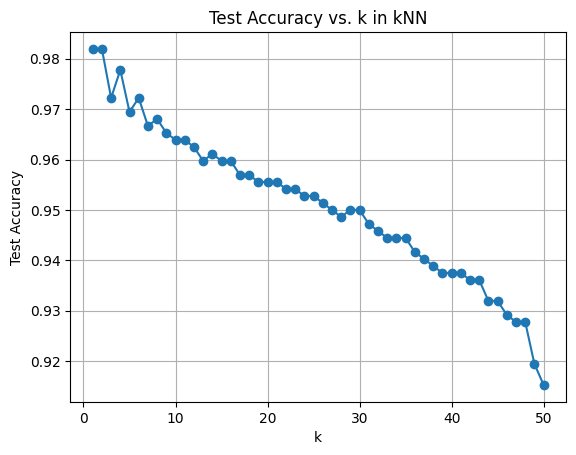

In [11]:
# @title Part 2


# Load the dataset
data = Q1Data

# # Split into features (X) and target variable (y)
X = data.iloc[:, :21]
y = data["Genus"]
# print(X)

# def standardization(X):
#     mean_values = X.mean(axis=0)
#     std_dev_values = X.std(axis=0)
#     standardized_X = (X - mean_values) / std_dev_values
#     return standardized_X.values

# # Step 2: Feature scaling
X_scaled = standardization(X)

# print()
# print(X_scaled)
# Encode categorical labels (Genus) using LabelEncoder
# y_encoded = LabelEncoder().fit_transform(y)
y_encoded = [{label: idx for idx, label in enumerate(set(y))}[label] for label in y]
# print(y_encoded)

# Step 3: Split the dataset (30% training, 10% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.1, train_size=0.3, random_state=42)
# Part 2a: kNN Classifier from scratch
# def euclideanDistance(x1, x2):
#     return np.sqrt(np.sum((x1 - x2) ** 2))

def k_nearest_neighbors(X_train, y_train, x_test, k):
    # distances = [np.sqrt(np.sum((x_test - x_train) ** 2)) for x_train in X_train]
    # distances = [np.linalg.norm(x_test - x_train) for x_train in X_train]
    distances = np.linalg.norm(X_train - x_test, axis=1)
    k_neighbors_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_neighbors_indices]
    most_common_label = np.bincount(k_nearest_labels).argmax()
    return most_common_label

def kNN_predict(X_train, y_train, X_test, k):
    predictions = [k_nearest_neighbors(X_train, y_train, x_test, k) for x_test in X_test]
    return predictions

# Part 2b: Plot the test accuracy for k ranging from 1 to 50
k_values = list(range(1, 51))
knn_test_accuracies = []

for k in k_values:
    print(k)
    y_pred = kNN_predict(X_train, y_train, X_test, k)
    accuracy = accuracy_score(y_test, y_pred)
    knn_test_accuracies.append(accuracy)

# Plotting
plt.plot(k_values, knn_test_accuracies, marker='o')
plt.title('Test Accuracy vs. k in kNN')
plt.xlabel('k')
plt.ylabel('Test Accuracy')
plt.grid(True)
plt.show()


In [12]:
# @title Default title text
# import numpy as np
# import pandas as pd
# from collections import Counter

# # Function to compute Euclidean distance between two data points
# def euclidean_distance(point1, point2):
#     return np.sqrt(np.sum((point1 - point2)**2))

# # Function to predict the Genus using k-Nearest Neighbors
# def knn_predict(train_data, train_target, test_point, k):
#     distances = [euclidean_distance(test_point, train_point) for train_point in train_data]
#     sorted_indices = np.argsort(distances)
#     k_nearest_labels = train_target[sorted_indices[:k]]
#     most_common_label = Counter(k_nearest_labels).most_common(1)[0][0]
#     return most_common_label

# # Function to evaluate the accuracy of the kNN model on a dataset
# def knn_accuracy(train_data, train_target, test_data, test_target, k):
#     predictions = [knn_predict(train_data, train_target, test_point, k) for _, test_point in test_data.iterrows()]
#     correct_predictions = np.sum(predictions == test_target)
#     accuracy = correct_predictions / len(test_target)
#     return accuracy

# # Load the dataset
# df = Q1Data

# # Select all 21 features and the target variable (Genus)
# features = df.drop(['Family', 'Genus', 'Species'], axis=1)
# target = df['Genus']

# # Split the dataset into train and test sets
# train_data, test_data = train_test_split(df, test_size=0.2, random_seed=42)

# # Convert data to numpy arrays for faster computation
# train_data_np = train_data.drop(['Family', 'Genus', 'Species'], axis=1).values
# train_target_np = train_data['Genus'].values
# test_data_np = test_data.drop(['Family', 'Genus', 'Species'], axis=1).values
# test_target_np = test_data['Genus'].values

# # Set the value of k
# k_value = 5

# # Evaluate the accuracy of the kNN model
# test_accuracy = knn_accuracy(train_data_np, train_target_np, test_data_np, test_target_np, k_value)
# print("kNN Accuracy on Test Set:", test_accuracy)


In [13]:
# @title Default title text
# # Function to split the dataset into reference/training and test sets
# def split_reference_test(data, reference_size=0.3, test_size=0.1, random_seed=None):
#     if random_seed:
#         np.random.seed(random_seed)

#     # Shuffle indices
#     indices = np.arange(len(data))
#     np.random.shuffle(indices)

#     # Calculate split indices
#     reference_end = int(len(data) * reference_size)
#     test_end = reference_end + int(len(data) * test_size)

#     # Split the data
#     reference_data = data.iloc[indices[:reference_end]]
#     test_data = data.iloc[indices[reference_end:test_end]]

#     return reference_data, test_data

# # Function to evaluate the accuracy of the kNN model on a dataset
# def knn_accuracy_modified(reference_data, reference_target, test_data, test_target, k):
#     predictions = [knn_predict(reference_data.values, reference_target.values, test_point, k) for _, test_point in test_data.iterrows()]
#     correct_predictions = np.sum(predictions == test_target)
#     accuracy = correct_predictions / len(test_target)
#     return accuracy

# # Split the dataset into reference/training and test sets
# reference_data, test_data_knn = split_reference_test(df, reference_size=0.3, test_size=0.1, random_seed=42)

# # Convert data to numpy arrays for faster computation
# reference_data_np = reference_data.drop(['Family', 'Genus', 'Species'], axis=1).values
# reference_target_np = reference_data['Genus'].values
# test_data_np_knn = test_data_knn.drop(['Family', 'Genus', 'Species'], axis=1).values
# test_target_np_knn = test_data_knn['Genus'].values

# # Range of k values to test
# k_values = range(1, 51)
# test_accuracies_knn = []

# # Evaluate the accuracy of the kNN model for different k values
# for k in k_values:
#     test_accuracy_knn = knn_accuracy_modified(reference_data, reference_data['Genus'], test_data_knn, test_data_knn['Genus'], k)
#     test_accuracies_knn.append(test_accuracy_knn)

# # Plot the results
# plt.plot(k_values, test_accuracies_knn, marker='o')
# plt.title('kNN Test Accuracy vs. k')
# plt.xlabel('k (Number of Neighbors)')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()


> Part 3 : Using Scikit-Learn functions
>
> a\. Now use the inbuilt functions of sklearn library for both Decision
> Trees and k Nearest Neighbours.
>
> b\. Here you need to use all the features and entire dataset.
> i. For Decision Tree : **Train Test ratio is 80:20** and **depth varies from
> 1,...15**
>
> ii\. For kNN : **Train Test ratio is 80:20** and **k varies from
> 1,....,1000.**
>
> c\. Plot the test accuracies as you have done in Part 1 and 2.
>
> d\. Plot all 4 graphs together on a subplot and report your observations
> comparing the accuracy of the model built from Scratch and the inbuilt
> function for both the classifiers.

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


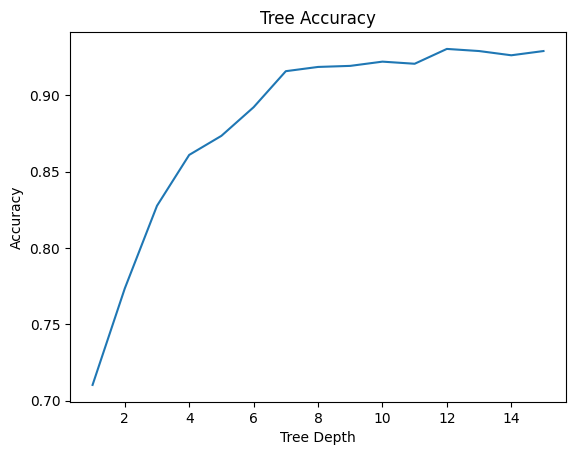

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


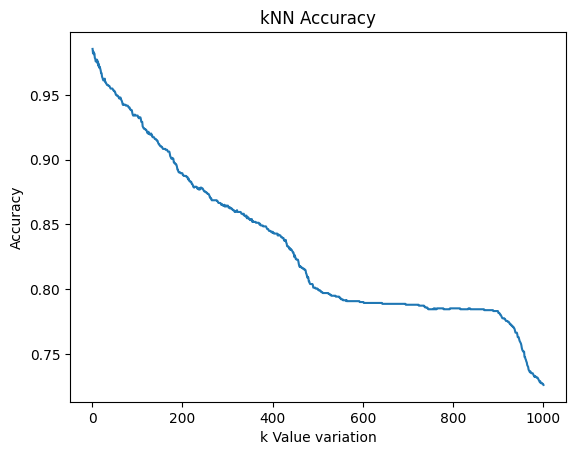

In [14]:
# @title Part 3


dataset = Q1Data
X = dataset[dataset.columns[0:21]]
Y = dataset[dataset.columns[22]]
# print(y)


x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size = 0.2)


skl_tree_accuracies = []
tree_depths = []

for i in range(1,16):
    print(i)
    tree_depths.append(i)
    skl_tree = tree.DecisionTreeClassifier(max_depth = i, criterion = "gini")
    skl_tree = skl_tree.fit(x_train,y_train)
    y_pred = skl_tree.predict(x_test)
    skl_tree_accuracies.append(accuracy_score(y_test, y_pred))

plt.plot(tree_depths,skl_tree_accuracies, marker='o')
plt.title("Tree Accuracy")
plt.xlabel("Tree Depth")
plt.ylabel("Accuracy")
plt.show()


skl_knn_accuracies = []
k_vals = []

for i in range(1,1001):
    print(i, sep = ' ')
    k_vals.append(i)
    skl_knn = neighbors.KNeighborsClassifier(n_neighbors = i)
    skl_knn = skl_knn.fit(x_train,y_train)
    y_pred = skl_knn.predict(x_test)
    skl_knn_accuracies.append(accuracy_score(y_test, y_pred))



plt.plot(k_vals,skl_knn_accuracies)
plt.title("kNN Accuracy")
plt.xlabel("k Value variation")
plt.ylabel("Accuracy")
plt.show()

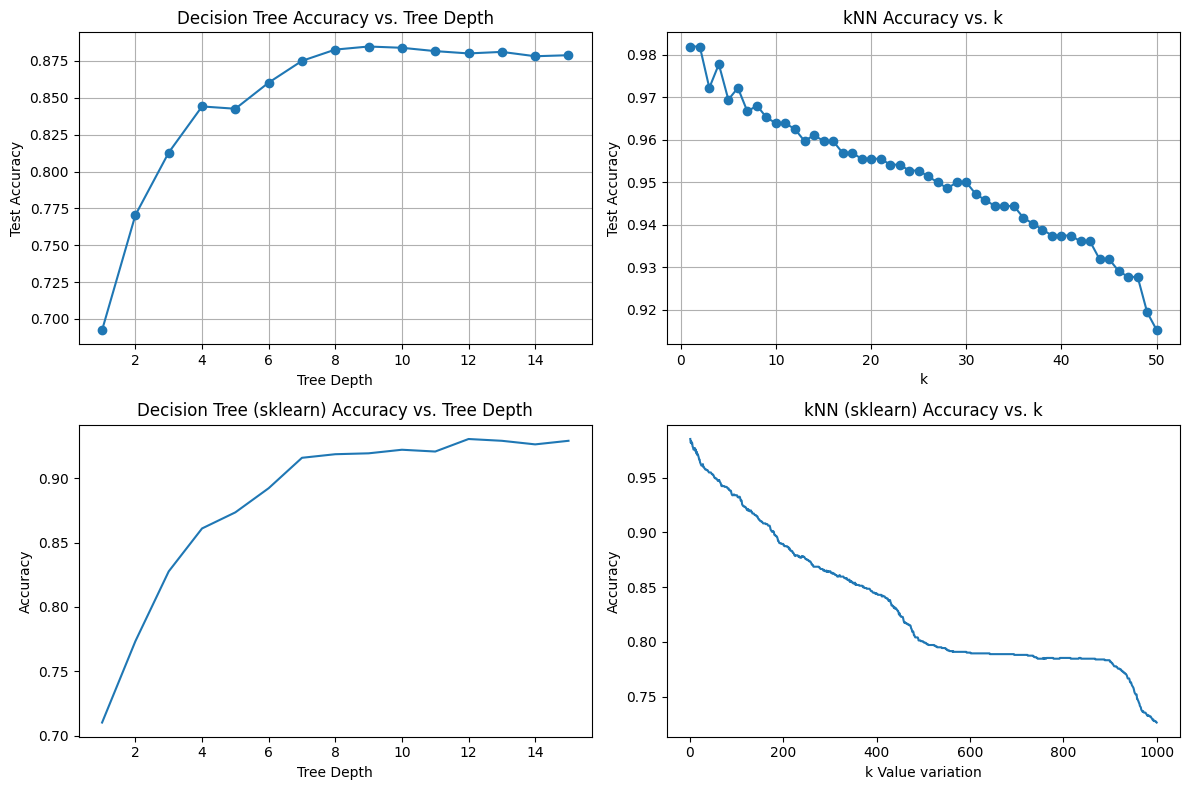

In [15]:
# @title Part 4
# Create subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))

# Plotting Decision Tree accuracy vs. tree depth
axes[0, 0].plot(max_depths, dt_test_accuracies, marker='o')
axes[0, 0].set_title('Decision Tree Accuracy vs. Tree Depth')
axes[0, 0].set_xlabel('Tree Depth')
axes[0, 0].set_ylabel('Test Accuracy')
axes[0, 0].grid(True)

# Plotting kNN accuracy vs. k
axes[0, 1].plot(k_values, knn_test_accuracies, marker='o')
axes[0, 1].set_title('kNN Accuracy vs. k')
axes[0, 1].set_xlabel('k')
axes[0, 1].set_ylabel('Test Accuracy')
axes[0, 1].grid(True)

# Plotting Decision Tree accuracy vs. tree depth (sklearn)
axes[1, 0].plot(tree_depths, skl_tree_accuracies)
axes[1, 0].set_title('Decision Tree (sklearn) Accuracy vs. Tree Depth')
axes[1, 0].set_xlabel('Tree Depth')
axes[1, 0].set_ylabel('Accuracy')

# Plotting kNN accuracy vs. k (sklearn)
axes[1, 1].plot(k_vals, skl_knn_accuracies)
axes[1, 1].set_title('kNN (sklearn) Accuracy vs. k')
axes[1, 1].set_xlabel('k Value variation')
axes[1, 1].set_ylabel('Accuracy')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()


In [16]:
# @title Default title text
# plt.plot(k_vals[:51],skl_knn_accuracies[:51])
# plt.title("kNN Accuracy")
# plt.xlabel("k Value variation")
# plt.ylabel("Accuracy")
# plt.show()

In [17]:
# @title Default title text
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Define the Decision Tree Node class
# class Node:
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
#         self.feature_index = feature_index  # Index of the feature to split on
#         self.threshold = threshold  # Threshold value for the split
#         self.left = left  # Left subtree
#         self.right = right  # Right subtree
#         self.value = value  # Class label for leaf nodes

# # Decision Tree Classifier
# class DecisionTreeClassifier:
#     def __init__(self, max_depth=None, min_samples_leaf=1):
#         self.max_depth = max_depth  # Maximum depth of the tree
#         self.min_samples_leaf = min_samples_leaf  # Minimum samples per leaf
#         self.tree = None  # Root of the decision tree

#     def fit(self, X, y):
#         self.tree = self._fit(X, y, depth=0)

#     def _fit(self, X, y, depth):
#         num_samples, num_features = X.shape
#         unique_classes, counts = np.unique(y, return_counts=True)
#         most_common_class = unique_classes[np.argmax(counts)]

#         # Stop conditions
#         if depth == self.max_depth or len(np.unique(y)) == 1 or len(y) <= self.min_samples_leaf:
#             return Node(value=most_common_class)

#         # Calculate Gini impurity once per feature
#         ginis = []
#         for feature_index in range(num_features):
#             thresholds = np.unique(X.iloc[:, feature_index])
#             left_mask = (X.iloc[:, feature_index].values[:, None] <= thresholds).flatten()[:num_samples]
#             right_mask = ~left_mask
#             gini_left = self._gini_impurity(y[left_mask])
#             gini_right = self._gini_impurity(y[right_mask])
#             gini = gini_left * np.sum(left_mask) / num_samples + gini_right * np.sum(right_mask) / num_samples

#             ginis.append(gini)


#         ginis = np.array(ginis)
#         best_feature_index = np.argmin(ginis)
#         best_threshold = np.unique(X.iloc[:, best_feature_index])[np.argmin(ginis[best_feature_index])]

#         if ginis[best_feature_index] == float('inf'):
#             return Node(value=most_common_class)

#         # Recursive split
#         left_mask = X.iloc[:, best_feature_index] <= best_threshold
#         right_mask = ~left_mask
#         left_subtree = self._fit(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self._fit(X[right_mask], y[right_mask], depth + 1)

#         return Node(feature_index=best_feature_index, threshold=best_threshold,
#                     left=left_subtree, right=right_subtree)


#     def _gini_impurity(self, y):
#         classes, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         gini = 1 - np.sum(probabilities ** 2)
#         return gini

#     def predict(self, X):
#         return np.array([self._predict(x, self.tree) for x in X.values])

#     def _predict(self, x, node):
#         if node.value is not None:
#             return node.value

#         # Check if the feature value is numeric
#         if np.issubdtype(type(x[node.feature_index]), np.number):
#             # For numeric features
#             if x[node.feature_index] <= node.threshold:
#                 return self._predict(x, node.left)
#             else:
#                 return self._predict(x, node.right)
#         else:
#             # For non-numeric features
#             if np.all(x[node.feature_index] == node.threshold):
#                 return self._predict(x, node.left)
#             else:
#                 return self._predict(x, node.right)




# # Load the dataset
# data = Q1Data[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'Genus']]

# # # Split into features (X) and target variable (y)
# X = data.iloc[:, :6]
# y = data["Genus"]

# # Step 2: Feature scaling
# X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# # Step 3: Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)
# print(X_scaled, y)
# '''
# # Part 1a: Train Decision Tree Classifier from scratch
# max_depths = list(range(1, 16))
# dt_test_accuracies = []

# for max_depth in max_depths:
#     print(max_depth)
#     # Train the decision tree
#     dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=1)
#     dt_classifier.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = dt_classifier.predict(X_test)

#     # Calculate test accuracy
#     test_accuracy = accuracy_score(y_test, y_pred)
#     dt_test_accuracies.append(test_accuracy)

# # Part 1b: Plot the test accuracy by pruning the tree
# plt.plot(max_depths, dt_test_accuracies, marker='o')
# plt.title('Test Accuracy vs. Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()
# '''

In [18]:
# @title Default title text
# import numpy as np
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Define the Decision Tree Node class
# class Node:
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
#         self.feature_index = feature_index  # Index of the feature to split on
#         self.threshold = threshold  # Threshold value for the split
#         self.left = left  # Left subtree
#         self.right = right  # Right subtree
#         self.value = value  # Class label for leaf nodes

# # Decision Tree Classifier
# class DecisionTreeClassifier:
#     def __init__(self, max_depth=None, min_samples_leaf=1):
#         self.max_depth = max_depth  # Maximum depth of the tree
#         self.min_samples_leaf = min_samples_leaf  # Minimum samples per leaf
#         self.tree = None  # Root of the decision tree

#     def fit(self, X, y):
#         self.tree = self._fit(X, y, depth=0)

#     def _fit(self, X, y, depth):
#         num_samples, num_features = X.shape
#         unique_classes, counts = np.unique(y, return_counts=True)
#         most_common_class = unique_classes[np.argmax(counts)]

#         # Stop conditions
#         if depth == self.max_depth or len(np.unique(y)) == 1 or len(y) <= self.min_samples_leaf:
#             return Node(value=most_common_class)

#         # Calculate Gini impurity once per feature
#         ginis = []
#         for feature_index in range(num_features):
#             thresholds = np.unique(X.iloc[:, feature_index])
#             left_mask = X.iloc[:, feature_index][:, None] <= thresholds
#             right_mask = ~left_mask
#             gini_left = self._gini_impurity(y[left_mask[:, 0]])
#             gini_right = self._gini_impurity(y[right_mask[:, 0]])
#             # gini = gini_left * np.sum(left_mask, axis=0) / num_samples + gini_right * np.sum(right_mask, axis=0) / num_samples
#             gini = gini_left * np.sum(left_mask) / num_samples + gini_right * np.sum(right_mask) / num_samples

#             ginis.append(gini)


#         ginis = np.array(ginis)
#         best_feature_index = np.argmin(ginis)
#         # best_threshold = np.unique(X[:, best_feature_index])[np.argmin(ginis[best_feature_index])]
#         best_threshold = np.unique(X.iloc[:, best_feature_index])[np.argmin(ginis[best_feature_index])]


#         if ginis[best_feature_index] == float('inf'):
#             return Node(value=most_common_class)

#         # Recursive split
#         left_mask = X.iloc[:, best_feature_index] <= best_threshold
#         right_mask = ~left_mask
#         left_subtree = self._fit(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self._fit(X[right_mask], y[right_mask], depth + 1)

#         return Node(feature_index=best_feature_index, threshold=best_threshold,
#                     left=left_subtree, right=right_subtree)

#     def _gini_impurity(self, y):
#         classes, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         gini = 1 - np.sum(probabilities ** 2)
#         return gini

#     def predict(self, X):
#         return np.array([self._predict(x, self.tree) for x in X.values])

#     def _predict(self, x, node):
#         if node.value is not None:
#             return node.value

#         # Check if the feature value is numeric
#         if isinstance(x[node.feature_index], (int, float, np.int64, np.float64)):
#             # For numeric features
#             if x[node.feature_index] <= node.threshold:
#                 return self._predict(x, node.left)
#             else:
#                 return self._predict(x, node.right)
#         else:
#             # For non-numeric features
#             if np.all(x[node.feature_index] == node.threshold):
#                 return self._predict(x, node.left)
#             else:
#                 return self._predict(x, node.right)



# # Load the dataset
# data = Q1Data[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'Genus']]

# # # Split into features (X) and target variable (y)
# X = data.iloc[:, :6]
# y = data["Genus"]

# # Step 2: Feature scaling
# X_scaled = (X - X.mean(axis=0)) / X.std(axis=0)

# # Step 3: Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)

# # Part 1a: Train Decision Tree Classifier from scratch
# max_depths = list(range(1, 16))
# dt_test_accuracies = []

# for max_depth in max_depths:
#     print(max_depth)
#     # Train the decision tree
#     dt_classifier = DecisionTreeClassifier(max_depth=max_depth, min_samples_leaf=1)
#     dt_classifier.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = dt_classifier.predict(X_test)

#     # Calculate test accuracy
#     test_accuracy = accuracy_score(y_test, y_pred)
#     dt_test_accuracies.append(test_accuracy)

# # Part 1b: Plot the test accuracy by pruning the tree
# plt.plot(max_depths, dt_test_accuracies, marker='o')
# plt.title('Test Accuracy vs. Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()

In [19]:
# @title Default title text
# # @title Part 1
# from collections import Counter

# # Define the Decision Tree Node class
# class Node:
#     def __init__(self, feature_index=None, threshold=None, left=None, right=None, value=None):
#         self.feature_index = feature_index  # Index of the feature to split on
#         self.threshold = threshold  # Threshold value for the split
#         self.left = left  # Left subtree
#         self.right = right  # Right subtree
#         self.value = value  # Class label for leaf nodes

# # Decision Tree Classifier
# class DecisionTreeClassifier:
#     def __init__(self, max_depth=None):
#         self.max_depth = max_depth  # Maximum depth of the tree
#         self.tree = None  # Root of the decision tree
#         self.most_common_class_from_parent = None

#     def fit(self, X, y):
#         class_counts = Counter(y)
#         self.most_common_class_from_parent = class_counts.most_common(1)[0][0]
#         self.tree = self._fit(X, y, depth=0)

#     def _fit(self, X, y, depth):
#         num_samples, num_features = X.shape
#         unique_classes, counts = np.unique(y, return_counts=True)
#         if len(unique_classes) == 0:
#             # If unique_classes is empty, return a leaf node with the most common class from the parent
#             return Node(value=self.most_common_class_from_parent)
#         most_common_class = unique_classes[np.argmax(counts)]

#         # Stop conditions
#         # if depth == self.max_depth or len(np.unique(y)) == 1:
#         if depth == self.max_depth or len(unique_classes) == 1:
#             return Node(value=most_common_class)

#         # Find the best split
#         best_gini = float('inf')
#         best_feature_index = None
#         best_threshold = None

#         for feature_index in range(num_features):
#             thresholds = np.unique(X[:, feature_index])
#             left_masks = X[:, feature_index][:, None] <= thresholds
#             right_masks = ~left_masks
#             left_sizes = np.sum(left_masks, axis=0)
#             right_sizes = num_samples - left_sizes


#             gini = (self._gini_impurity(y[left_masks[:, 0]]) * left_sizes +
#                     self._gini_impurity(y[right_masks[:, 0]]) * right_sizes) / num_samples

#             best_threshold_idx = np.argmin(gini)
#             gini_min = gini[best_threshold_idx]

#             if gini_min < best_gini:
#                 best_gini = gini_min
#                 best_feature_index = feature_index
#                 best_threshold = thresholds[best_threshold_idx]

#         if best_gini == float('inf'):
#             return Node(value=most_common_class)

#         # Recursive split
#         left_mask = X[:, best_feature_index] <= best_threshold
#         right_mask = ~left_mask
#         left_subtree = self._fit(X[left_mask], y[left_mask], depth + 1)
#         right_subtree = self._fit(X[right_mask], y[right_mask], depth + 1)

#         return Node(feature_index=best_feature_index, threshold=best_threshold,
#                     left=left_subtree, right=right_subtree)

#     def _gini_impurity(self, y):
#         classes, counts = np.unique(y, return_counts=True)
#         probabilities = counts / len(y)
#         gini = 1 - np.sum(probabilities ** 2)
#         return gini

#     def predict(self, X):
#         return np.array([self._predict(x, self.tree) for x in X])

#     def _predict(self, x, node):
#         if node.value is not None:
#             return node.value
#         if x[node.feature_index] <= node.threshold:
#             return self._predict(x, node.left)
#         else:
#             return self._predict(x, node.right)

# # Load the dataset
# data = Q1Data[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6', 'Genus']]

# # # Split into features (X) and target variable (y)
# X = data.iloc[:, :6]
# y = data["Genus"]


# # # Step 2: Feature scaling
# # X = data.iloc[:, :6]
# # def standardization(X):
# #     mean_values = X.mean(axis=0)
# #     std_dev_values = X.std(axis=0)
# #     standardized_X = (X - mean_values) / std_dev_values
# #     return standardized_X.values
# X_scaled = standardization(X)


# # print(X, '\n')
# # X_scaled1 = StandardScaler().fit_transform(X)
# # print(X_scaled1)
# # print(StandardScaler, '\n')
# # X = data_encoded.iloc[:, :6]
# # X_scaled = min_max_scaling(X)
# # print(X_scaled)
# # print(min_max_scaling, '\n')
# # print(X_scaled2)
# # print(standardization, '\n')
# # X = data_encoded.iloc[:, :6]
# # X_scaled = robust_scaling(X)
# # print(X_scaled)
# # print(robust_scaling, '\n')
# # X = data_encoded.iloc[:, :6]
# # X_scaled = normalization(X)
# # print(X_scaled)
# # print(normalization, '\n')
# # print(X.head(10))
# # print(y.head(10))

# # # Step 3: Split the dataset
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.8, random_state=42)


# # Part 1a: Train Decision Tree Classifier from scratch
# max_depths = list(range(1, 16))
# dt_test_accuracies = []

# for max_depth in max_depths:
#     print(max_depth)
#     # Train the decision tree
#     dt_classifier = DecisionTreeClassifier(max_depth=max_depth)
#     dt_classifier.fit(X_train, y_train)

#     # Make predictions on the test set
#     y_pred = dt_classifier.predict(X_test)

#     # Calculate test accuracy
#     test_accuracy = accuracy_score(y_test, y_pred)
#     dt_test_accuracies.append(test_accuracy)

# # Part 1b: Plot the test accuracy by pruning the tree
# plt.plot(max_depths, dt_test_accuracies, marker='o')
# plt.title('Test Accuracy vs. Tree Depth')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()


In [20]:
# @title Default title text
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score

# # Load the dataset
# df = Q1Data

# # Select the first 6 features and the target variable (Genus)
# features = df[['MFCCs_1', 'MFCCs_2', 'MFCCs_3', 'MFCCs_4', 'MFCCs_5', 'MFCCs_6']]
# target = df['Genus']

# # Split the dataset into train and test sets
# train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.8, random_state=42)

# # Create a Decision Tree Classifier
# dt_classifier = DecisionTreeClassifier()

# # Train the model
# dt_classifier.fit(train_data, train_target)

# # Make predictions on the test set
# dt_predictions = dt_classifier.predict(test_data)

# # Evaluate the accuracy
# dt_accuracy = accuracy_score(test_target, dt_predictions)
# print("Decision Tree Accuracy:", dt_accuracy)


In [21]:
# @title Default title text
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler

# # Load the dataset
# df = Q1Data

# # Select all 21 features and the target variable (Genus)
# features = df.drop(['Family', 'Genus', 'Species'], axis=1)
# target = df['Genus']

# # Split the dataset into train and test sets
# train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# # Standardize the features (important for kNN)
# scaler = StandardScaler()
# train_data_scaled = scaler.fit_transform(train_data)
# test_data_scaled = scaler.transform(test_data)

# # Create a k-Nearest Neighbors Classifier
# knn_classifier = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors (n_neighbors) as needed

# # Train the model
# knn_classifier.fit(train_data_scaled, train_target)

# # Make predictions on the test set
# knn_predictions = knn_classifier.predict(test_data_scaled)

# # Evaluate the accuracy
# knn_accuracy = accuracy_score(test_target, knn_predictions)
# print("kNN Accuracy:", knn_accuracy)


In [22]:
# @title Default title text
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# import matplotlib.pyplot as plt

# # Load the dataset
# df = Q1Data

# # Select all features and the target variable (Genus)
# features = df.drop(['Family', 'Genus', 'Species'], axis=1)
# target = df['Genus']

# # Split the dataset into train and test sets (80:20 ratio)
# train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# # Range of depth values to test
# depth_values = range(1, 16)
# test_accuracies_dt = []

# # Evaluate the accuracy of the Decision Tree model for different depth values
# for depth in depth_values:
#     dt_classifier = DecisionTreeClassifier(max_depth=depth, random_state=42)
#     dt_classifier.fit(train_data, train_target)
#     dt_predictions = dt_classifier.predict(test_data)
#     test_accuracy_dt = accuracy_score(test_target, dt_predictions)
#     test_accuracies_dt.append(test_accuracy_dt)

# # Plot the results
# plt.plot(depth_values, test_accuracies_dt, marker='o')
# plt.title('Decision Tree Test Accuracy vs. Depth')
# plt.xlabel('Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()


In [23]:
# @title Default title text
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.preprocessing import StandardScaler
# import matplotlib.pyplot as plt

# # Load the dataset
# df = Q1Data

# # Select all features and the target variable (Genus)
# features = df.drop(['Family', 'Genus', 'Species'], axis=1)
# target = df['Genus']

# # Split the dataset into train and test sets (80:20 ratio)
# train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# # Standardize the features (important for kNN)
# scaler = StandardScaler()
# train_data_scaled = scaler.fit_transform(train_data)
# test_data_scaled = scaler.transform(test_data)

# # Range of k values to test
# k_values = range(1, 1001, 50)  # Adjust the step size as needed
# test_accuracies_knn = []

# # Evaluate the accuracy of the kNN model for different k values
# for k in k_values:
#     knn_classifier = KNeighborsClassifier(n_neighbors=k)
#     knn_classifier.fit(train_data_scaled, train_target)
#     knn_predictions = knn_classifier.predict(test_data_scaled)
#     test_accuracy_knn = accuracy_score(test_target, knn_predictions)
#     test_accuracies_knn.append(test_accuracy_knn)

# # Plot the results
# plt.plot(k_values, test_accuracies_knn, marker='o')
# plt.title('kNN Test Accuracy vs. k')
# plt.xlabel('k (Number of Neighbors)')
# plt.ylabel('Test Accuracy')
# plt.grid(True)
# plt.show()


In [24]:
# @title Default title text
# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.model_selection import train_test_split
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import StandardScaler

# # Load the dataset
# df = Q1Data

# # Select relevant features and target variable (Genus)
# features = df.drop(['Family', 'Genus', 'Species'], axis=1)
# target = df['Genus']

# # Split the dataset into train and test sets (80:20 ratio)
# train_data, test_data, train_target, test_target = train_test_split(features, target, test_size=0.2, random_state=42)

# # Standardize the features (important for kNN)
# scaler = StandardScaler()
# train_data_scaled = scaler.fit_transform(train_data)
# test_data_scaled = scaler.transform(test_data)

# # Function to compute Euclidean distance between two data points
# def euclidean_distance(point1, point2):
#     return np.sqrt(np.sum((point1 - point2)**2))

# # Function to predict the Genus using k-Nearest Neighbors (from scratch)
# def knn_predict(train_data, train_target, test_point, k):
#     distances = [euclidean_distance(test_point, train_point) for train_point in train_data]
#     sorted_indices = np.argsort(distances)
#     k_nearest_labels = train_target[sorted_indices[:k]]
#     most_common_label = np.argmax(np.bincount(k_nearest_labels))
#     return most_common_label

# # Function to evaluate the accuracy of the kNN model (from scratch)
# def knn_accuracy(train_data, train_target, test_data, test_target, k):
#     predictions = [knn_predict(train_data, train_target, test_point, k) for test_point in test_data]
#     correct_predictions = np.sum(predictions == test_target)
#     accuracy = correct_predictions / len(test_target)
#     return accuracy

# # Range of k values to test
# k_values_scratch = range(1, 51)
# test_accuracies_knn_scratch = []

# # Evaluate the accuracy of the kNN model (from scratch) for different k values
# for k in k_values_scratch:
#     test_accuracy_knn_scratch = knn_accuracy(train_data.values, train_target.values, test_data.values, test_target.values, k)
#     test_accuracies_knn_scratch.append(test_accuracy_knn_scratch)

# # Plot the kNN test accuracy from scratch
# plt.figure(figsize=(12, 8))
# plt.subplot(2, 2, 1)
# plt.plot(k_values_scratch, test_accuracies_knn_scratch, marker='o')
# plt.title('kNN (from Scratch) Test Accuracy vs. k')
# plt.xlabel('k (Number of Neighbors)')
# plt.ylabel('Test Accuracy')
# plt.grid(True)

# # Decision Tree (from scratch) code from Part 1
# # ...

# # Decision Tree (scikit-learn)
# depth_values = range(1, 16)
# test_accuracies_dt_sklearn = []

# for depth in depth_values:
#     dt_classifier_sklearn = DecisionTreeClassifier(max_depth=depth, random_state=42)
#     dt_classifier_sklearn.fit(train_data, train_target)
#     dt_predictions_sklearn = dt_classifier_sklearn.predict(test_data)
#     test_accuracy_dt_sklearn = accuracy_score(test_target, dt_predictions_sklearn)
#     test_accuracies_dt_sklearn.append(test_accuracy_dt_sklearn)

# plt.subplot(2, 2, 2)
# plt.plot(depth_values, test_accuracies_dt_sklearn, marker='o')
# plt.title('Decision Tree (Scikit-learn) Test Accuracy vs. Depth')
# plt.xlabel('Depth')
# plt.ylabel('Test Accuracy')
# plt.grid(True)

# # kNN (scikit-learn) code from Part 2
# k_values_sklearn = range(1, 1001, 50)
# test_accuracies_knn_sklearn = []

# for k in k_values_sklearn:
#     knn_classifier_sklearn = KNeighborsClassifier(n_neighbors=k)
#     knn_classifier_sklearn.fit(train_data_scaled, train_target)
#     knn_predictions_sklearn = knn_classifier_sklearn.predict(test_data_scaled)
#     test_accuracy_knn_sklearn = accuracy_score(test_target, knn_predictions_sklearn)
#     test_accuracies_knn_sklearn.append(test_accuracy_knn_sklearn)

# plt.subplot(2, 2, 3)
# plt.plot(k_values_sklearn, test_accuracies_knn_sklearn, marker='o')
# plt.title('kNN (Scikit-learn) Test Accuracy vs. k')
# plt.xlabel('k (Number of Neighbors)')
# plt.ylabel('Test Accuracy')
# plt.grid(True)

# # Plot all 4 graphs together on a subplot
# plt.subplot(2, 2, 4)
# plt.plot(k_values_scratch, test_accuracies_knn_scratch, label='kNN (from Scratch)', marker='o')
# plt.plot(depth_values, test_accuracies_dt_sklearn, label='Decision Tree (Scikit-learn)', marker='o')
# plt.plot(k_values_sklearn, test_accuracies_knn_sklearn, label='kNN (Scikit-learn)', marker='o')
# plt.legend()
# plt.title('Comparison of Test Accuracies')
# plt.xlabel('Parameter Value')
# plt.ylabel('Test Accuracy')
# plt.grid(True)

# plt.tight_layout()
# plt.show()


In [25]:
# @title Default title text
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# from sklearn.preprocessing import LabelEncoder

# # Load the dataset
# Q1Data = pd.read_csv('/content/Q1Data.csv')

# # Set the target variable
# target_variable = 'Genus'

# # Encode the target variable 'Genus'
# label_encoder = LabelEncoder()
# Q1Data[target_variable] = label_encoder.fit_transform(Q1Data[target_variable])


# # Encode categorical features
# Q1Data_encoded = pd.get_dummies(Q1Data, columns=['Family', 'Species'])

# # Split the data into features and target variable
# X = Q1Data_encoded.drop(columns=[target_variable])
# y = Q1Data_encoded[target_variable]


# # Split the data into train and test sets (80% train, 20% test)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize lists to store depths and corresponding accuracies for Decision Trees
# depths = list(range(1, 16))
# accuracies_decision_tree_sklearn = []

# # Train and test Decision Trees using scikit-learn
# for depth in depths:
#     print(depth)
#     dt_model = DecisionTreeClassifier(max_depth=depth, random_state=42)
#     dt_model.fit(X_train, y_train)
#     y_pred_dt = dt_model.predict(X_test)
#     accuracy_dt = accuracy_score(y_test, y_pred_dt)
#     accuracies_decision_tree_sklearn.append(accuracy_dt)

# # Initialize lists to store k values and corresponding accuracies for kNN
# k_values = list(range(1, 1001))
# accuracies_knn_sklearn = []

# # Train and test kNN using scikit-learn
# for k in k_values:
#     print(k)
#     knn_model = KNeighborsClassifier(n_neighbors=k)
#     knn_model.fit(X_train, y_train)
#     y_pred_knn = knn_model.predict(X_test)
#     accuracy_knn = accuracy_score(y_test, y_pred_knn)
#     accuracies_knn_sklearn.append(accuracy_knn)


In [26]:
# @title Default title text
# # Plotting all four graphs together
# plt.figure(figsize=(15, 10))

# # # Plotting Decision Tree from Scratch
# # plt.subplot(2, 2, 1)
# # plt.plot(depths, accuracies, marker='o', label='Decision Tree (From Scratch)')
# # plt.title('Decision Tree Test Accuracy vs. Depth (From Scratch)')
# # plt.xlabel('Tree Depth')
# # plt.ylabel('Test Accuracy')
# # plt.legend()

# # Plotting Decision Tree using scikit-learn
# plt.subplot(2, 2, 1)
# plt.plot(depths, accuracies_decision_tree_sklearn, marker='o', label='Decision Tree (Scikit-learn)')
# plt.title('Decision Tree Test Accuracy vs. Depth (Scikit-learn)')
# plt.xlabel('Tree Depth')
# plt.ylabel('Test Accuracy')
# plt.legend()

# # # Plotting kNN from Scratch
# # plt.subplot(2, 2, 3)
# # plt.plot(k_values, accuracies_knn, marker='o', label='kNN (From Scratch)')
# # plt.title('kNN Test Accuracy vs. k (From Scratch)')
# # plt.xlabel('k')
# # plt.ylabel('Test Accuracy')
# # plt.legend()

# # Plotting kNN using scikit-learn
# plt.subplot(2, 2, 2)
# plt.plot(k_values, accuracies_knn_sklearn, marker='o', label='kNN (Scikit-learn)')
# plt.title('kNN Test Accuracy vs. k (Scikit-learn)')
# plt.xlabel('k')
# plt.ylabel('Test Accuracy')
# plt.legend()

# plt.tight_layout()
# plt.show()


In [27]:
# @title Default title text
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# from sklearn.model_selection import train_test_split
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score

# # Load the dataset
# Q1Data = pd.read_csv('/content/Q1Data.csv')
# Q1Data = Q1Data.rename(columns={
#     'MFCCs_ 1': 'MFCCs_1',
#     'MFCCs_ 2': 'MFCCs_2',
#     'MFCCs_ 3': 'MFCCs_3',
#     'MFCCs_ 4': 'MFCCs_4',
#     'MFCCs_ 5': 'MFCCs_5',
#     'MFCCs_ 6': 'MFCCs_6',
#     'MFCCs_ 7': 'MFCCs_7',
#     'MFCCs_ 8': 'MFCCs_8',
# })

# # Data Preprocessing
# X = Q1Data.iloc[:, :-3]  # Features
# y = Q1Data['Genus']      # Target

# # Split the data into training and testing sets (80:20 ratio)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Decision Trees - Using scikit-learn functions
# depths = np.arange(1, 16)
# test_accuracies_dt_sklearn = []

# for depth in depths:
#     dt_model_sklearn = DecisionTreeClassifier(max_depth=depth, random_state=42)
#     dt_model_sklearn.fit(X_train, y_train)
#     dt_predictions_sklearn = dt_model_sklearn.predict(X_test)
#     test_accuracy_sklearn = accuracy_score(y_test, dt_predictions_sklearn)
#     test_accuracies_dt_sklearn.append(test_accuracy_sklearn)

# # k Nearest Neighbours - Using scikit-learn functions
# k_values = np.arange(1, 1001)
# test_accuracies_knn_sklearn = []

# for k in k_values:
#     knn_model_sklearn = KNeighborsClassifier(n_neighbors=k)
#     knn_model_sklearn.fit(X_train, y_train)
#     knn_predictions_sklearn = knn_model_sklearn.predict(X_test)
#     test_accuracy_knn_sklearn = accuracy_score(y_test, knn_predictions_sklearn)
#     test_accuracies_knn_sklearn.append(test_accuracy_knn_sklearn)

# # Plotting all graphs together on subplots
# fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# # Plot 1: Test Accuracy vs. Tree Depth (from Scratch)
# axes[0, 0].plot(depths, test_accuracies, marker='o', label='From Scratch')
# axes[0, 0].set_title('Decision Tree - Test Accuracy vs. Tree Depth (From Scratch)')
# axes[0, 0].set_xlabel('Tree Depth')
# axes[0, 0].set_ylabel('Test Accuracy')
# axes[0, 0].legend()

# # Plot 2: Test Accuracy vs. Tree Depth (Scikit-Learn)
# axes[0, 1].plot(depths, test_accuracies_dt_sklearn, marker='o', label='Scikit-Learn')
# axes[0, 1].set_title('Decision Tree - Test Accuracy vs. Tree Depth (Scikit-Learn)')
# axes[0, 1].set_xlabel('Tree Depth')
# axes[0, 1].set_ylabel('Test Accuracy')
# axes[0, 1].legend()

# # Plot 3: Test Accuracy vs. k (From Scratch)
# axes[1, 0].plot(k_values, test_accuracies, marker='o', label='From Scratch')
# axes[1, 0].set_title('kNN - Test Accuracy vs. k (From Scratch)')
# axes[1, 0].set_xlabel('k (Number of Neighbors)')
# axes[1, 0].set_ylabel('Test Accuracy')
# axes[1, 0].set_xscale('log')
# axes[1, 0].legend()

# # Plot 4: Test Accuracy vs. k (Scikit-Learn)
# axes[1, 1].plot(k_values, test_accuracies_knn_sklearn, marker='o', label='Scikit-Learn')
# axes[1, 1].set_title('kNN - Test Accuracy vs. k (Scikit-Learn)')
# axes[1, 1].set_xlabel('k (Number of Neighbors)')
# axes[1, 1].set_ylabel('Test Accuracy')
# axes[1, 1].set_xscale('log')
# axes[1, 1].legend()

# plt.tight_layout()
# plt.show()

# # Display the maximum test accuracy and corresponding values for both classifiers
# max_accuracy_index_dt = np.argmax(test_accuracies)
# max_accuracy_depth_dt = depths[max_accuracy_index_dt]
# max_accuracy_dt = test_accuracies[max_accuracy_index_dt]

# max_accuracy_index_knn = np.argmax(test_accuracies_knn_sklearn)
# max_accuracy_k_knn = k_values[max_accuracy_index_knn]
# max_accuracy_knn = test_accuracies_knn_sklearn[max_accuracy_index_knn]

# print(f"\nDecision Tree - Maximum Test Accuracy (From Scratch): {max_accuracy_dt:.4f} at Tree Depth: {max_accuracy_depth_dt}")
# print(f"\nkNN - Maximum Test Accuracy (From Scratch): {max_accuracy:.4f} at k: {max_accuracy_k}")
# print(f"\nDecision Tree - Maximum Test Accuracy (Scikit-Learn): {max_accuracy_dt:.4f} at Tree Depth: {max_accuracy_depth_dt}")
# print(f"\nkNN - Maximum Test Accuracy (Scikit-Learn): {max_accuracy_knn:.4f} at k: {max_accuracy_k_knn}")

# # Observations:
# # Compare the four graphs and observe the test accuracy trends for both Decision Trees and kNN.
# # Compare the maximum test accuracy values and their corresponding parameters for models built from scratch
# # and using scikit-learn functions.
# # Consider factors such as computational efficiency, ease of use, and consistency in results.
